## Problem Statement :

- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

- Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

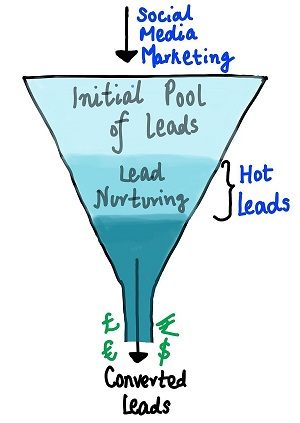

- As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

- X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

### Data
- You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

### Goals of the Case Study
- There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Step 1: Importing Libraries & Data

In [17]:
# Import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Importing the libraries.
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline


In [19]:
# Read data from file 'Leads.csv'

lead = pd.read_csv('Leads.csv')
lead.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


## Step 2: Inspecting the Dataframe

In [20]:
lead.shape

(9240, 37)

In [21]:
# Datatypes of each column
lead.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [22]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 - From above table we can observe that columns 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' contains outliers
 - Column Lead Number , Asymmetrique Activity score and Asymmetrique profile Score are normally disributed .

In [23]:
lead.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
lead.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [26]:
# Replacing 'Select' value with Null value as it is actually missing value 
lead.City.replace('Select', np.NaN, inplace = True)
lead.Specialization.replace('Select', np.NaN, inplace = True)
lead['How did you hear about X Education'].replace('Select', np.NaN, inplace = True)

## Step 3: Checking of Missing Values

In [27]:
# Determining the count of null values
lead.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [28]:
#Percentage of missing values for all columns in descending orders

null_count = round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending=False)
null_count

How did you hear about X Education               78.46
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [29]:
# finding columns with more 40% of null values
len(null_count[null_count>=40])

6

6 number of columns having missing value more than 40%  

In [30]:
null_count[null_count>=40]

How did you hear about X Education    78.46
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
dtype: float64

- After analysing these columns we can say that these have more than 40% of missing values and are not required for analysis. Therefore we can drop these columns

In [31]:
# dropping columns
lead.drop(null_count[null_count>=40].index, axis=1,inplace=True)

In [32]:
lead.shape

(9240, 31)

In [33]:
#analysing the coulmns left
null_count[null_count<40].sort_values(ascending= False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
X Education Forums                                0.00
Total Time Spent on Website                       0.00
Search                                            0.00
Magazine  

## Step 3.2 Checking Binary Variable

In [34]:
lead['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [35]:
lead['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [36]:
lead['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [37]:
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [38]:
lead['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [39]:
lead['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [40]:
lead['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [41]:
lead['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [42]:
lead['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [43]:
lead['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [44]:
lead['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [45]:
lead['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [46]:
lead['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

Observed all above columns have dominance of single value therfore no impact on target variables,so we can dro columns 

## 3.3 Dropping skewed columns

In [47]:
# Segregating all skewed columns 
skewed_columns = ['Magazine','Newspaper Article','Do Not Call','Search','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Update me on Supply Chain Content',
               'I agree to pay the amount through cheque','Do Not Email','Get updates on DM Content']

In [48]:
# dropping all skewed columns 
lead.drop(skewed_columns, axis = 1, inplace = True)

In [49]:
lead.shape

(9240, 18)

In [50]:
# Verifying remaining columns 
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Step 4: Imputing missing values

### 4.1 Imputation In 'Lead Source' column

In [51]:
#Percentage of missing values for all columns in descending orders

null_count = round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending=False)
null_count

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Prospect ID                                       0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Lead Origin                                       0.00
Last Notable Activity                             0.00
dtype: flo

In [52]:
# Imputation for 'Lead Quality' column

lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
NC_EDM                0.010865
welearnblog_Home      0.010865
testone               0.010865
WeLearn               0.010865
youtubechannel        0.010865
blog                  0.010865
Pay per Click Ads     0.010865
Name: Lead Source, dtype: float64

In [53]:
lead['Lead Source'].fillna(lead['Lead Source'].mode()[0], inplace = True)

- As from above we can observe most of the category are contributing less than 10% except 5 columns so we can club them into one head as Social Media 

In [54]:
for i in range(len(lead['Lead Source'])):
    if (lead['Lead Source'][i] != 'Google') and (lead['Lead Source'][i] != 'Direct Traffic') and (lead['Lead Source'][i] != 'Olark Chat') and (lead['Lead Source'][i] != 'Organic Search') and (lead['Lead Source'][i] != 'Reference'):
        lead['Lead Source'][i] = lead['Lead Source'][i].replace(lead['Lead Source'][i],'Social Media')

In [55]:
# Verifying after aggregating columns 
lead['Lead Source'].value_counts(normalize = True)*100

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Social Media       3.787879
Name: Lead Source, dtype: float64

In [56]:
# Checking Null Values
lead['Lead Source'].isnull().sum()

0

### 4.2 Imputation In 'City' column

In [57]:
# Imputation for 'City' column is needed therefore verifying values

lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- We Can make Category of City Column as Tiers to make easy to interpret .So making Mumbai and Other Metro Cities as Tier I Cities, Thane & Outskirts as Tier II City, Other Cities of Maharashtra as Tier III City

In [58]:
for i in range(len(lead)):
    if (lead.City[i] == 'Mumbai') or (lead.City[i] == 'Other Metro Cities'):
        lead.City[i] = lead.City[i].replace(lead.City[i], 'Tier I Cities')
    if lead.City[i] == 'Thane & Outskirts':
        lead.City[i] = lead.City[i].replace(lead.City[i], 'Tier II Cities')
    if (lead.City[i] == 'Other Cities') or (lead.City[i] == 'Other Cities of Maharashtra'):
        lead.City[i] = lead.City[i].replace(lead.City[i], 'Tier III Cities')

In [59]:
lead['City'].value_counts()

Tier I Cities      3602
Tier III Cities    1143
Tier II Cities      826
Name: City, dtype: int64

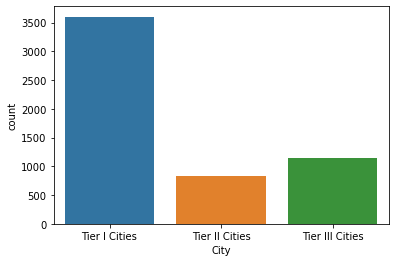

In [60]:
# Plotting graph of 'City'
sns.countplot(lead['City'])

plt.show()

- From Above graph we can observe that 'Tier I Cities' is having highest number of occurances so we will impute 'Mumbai' in place of missing values. 

In [61]:
# Imputing 'Tier I Cities' in place of missing values 

lead["City"].fillna("Tier I Cities", inplace = True)

In [62]:
lead['City'].isnull().sum()

0

In [63]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Philippines                2
China                      2
Italy                      2
Netherlands                2
Asia/Pacific Region        2
Belgium                    2
Bangladesh                 2
Ghana                      2
Uganda                     2
Liberia                    1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Indonesia                  1
Denmark                    1
Russia        

### We can see as the City Columns is giving more relevant information than Country Columns so we are dropping Country Columns as it is of no use

In [64]:
lead.drop(['Country'], axis = 1, inplace = True)

### 4.3 Imputation in 'What is your current occupation ' column

In [65]:
# Imputation for 'What is your current occupation' column

lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

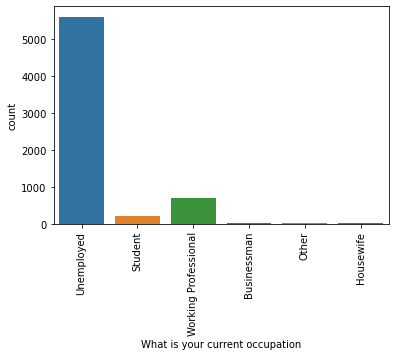

In [66]:
sns.countplot(lead['What is your current occupation'])
xticks(rotation = 90)
plt.show()

- We can see, from above graph we can observe 'Unemployed' followed by Working Professional and Student is having highest number of occurances so we will impute them Randomly in place of missing values.

In [67]:
lead['What is your current occupation'].fillna('XNA' , inplace = True)
lead = lead.sort_values(by = 'What is your current occupation', ascending = False)

In [68]:
import random
random__occupation = ['Unemployed', 'Working Professional', 'Student']

for i in range(len(lead)):
    if lead['What is your current occupation'][i] == 'XNA':
        var = random.choice(random__occupation)
        lead['What is your current occupation'][i] = lead['What is your current occupation'][i].replace(lead['What is your current occupation'][i], var)

In [69]:
lead['What is your current occupation'].value_counts()

Unemployed              6477
Working Professional    1597
Student                 1132
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [70]:
# Checking Missing Values
lead['What is your current occupation'].isnull().sum()

0

### Concating 'Housewife' and 'Businessman' with 'Other'

In [71]:
for i in range(len(lead)):
    if (lead['What is your current occupation'][i] == 'Housewife') or (lead['What is your current occupation'][i] == 'Businessman'):
        lead['What is your current occupation'][i] = lead['What is your current occupation'][i].replace(lead['What is your current occupation'][i], 'Other')

### 4.4 Imputation In 'Specialization' column


In [51]:
# Imputation for 'Specialization' column

lead['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

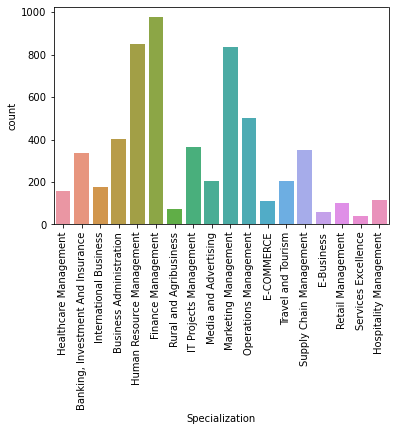

In [52]:
sns.countplot(lead['Specialization'])
xticks(rotation = 90)
plt.show()

- From above graph we can observe 'Finance Management' followed by Human Resource Management, Marketing Management and Operations Management is having highest number of occurances so we will impute them Randomly in place of missing values.

In [72]:
random__Specializations = ['Finance Management','Human Resource Management', 'Marketing Management',
                         'Operations Management']

for i in range(len(lead)):
    if lead.Specialization[i] == 'XNA':
        var = random.choice(random__Specializations)
        lead.Specialization[i] = lead.Specialization[i].replace(lead.Specialization[i], var)

- We Can merge Category of Specialization Column to make ease in understanding except Finance Management, Human Resource Management, Marketing Management and Operations Management .We will put in under 'Other' Category 

In [73]:
for i in range(len(lead)):
    if (lead.Specialization[i] != 'Finance Management') and (lead.Specialization[i] != 'Human Resource Management') and (lead.Specialization[i] != 'Marketing Management') and (lead.Specialization[i] != 'Operations Management'):
        lead.Specialization[i] = 'Other'

In [74]:
# Checking Imputation

lead['Specialization'].value_counts()

Other                        6075
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

In [56]:
# Checking Missing Values

lead['Specialization'].isnull().sum()

0

### 4.5 Imputation in ' What matters most to you in choosing a course ' column

In [75]:
# Imputation for 'What matters most to you in choosing a course' column

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- What matters most to you in choosing a course columns gives no information to us so we are dropping this columns

In [76]:
lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

### 4.6 Imputation in 'Total Visits'

In [59]:
lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

- Imputing TotalVisits using Median

In [77]:
lead['TotalVisits'].fillna(round(lead['TotalVisits'].median(),2), inplace = True)

In [78]:
lead['TotalVisits'].isnull().sum()

0

### 4.7 Imputation in 'Page Views Per Visit'

In [79]:
lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

- Imputing Page Views Per Visit using Median

In [80]:
lead['Page Views Per Visit'].fillna(round(lead['Page Views Per Visit'].median(),2), inplace = True)

lead['Page Views Per Visit'].isnull().sum()

0

#### Dropping of Lead Number

- As Lead number and Prospect ID gives same information so we are dropping 'Lead Number' as is having numeric value in columns

In [81]:
lead.drop(['Lead Number'], axis = 1, inplace = True)

## Step 4.3 Examine Categorical Columns

In [82]:
lead['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

- Adding 'Lead Import', 'Quick Add Form' in 'Lead Add Form' for ease in understanding

In [83]:
for i in range(len(lead)):
    if (lead['Lead Origin'][i] == 'Lead Import') or (lead['Lead Origin'][i] == 'Quick Add Form'):
        lead['Lead Origin'][i] = lead['Lead Origin'][i].replace(lead['Lead Origin'][i], 'Lead Add Form')

In [84]:
lead['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               8.376623
Name: Lead Origin, dtype: float64

In [85]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
2035,09f4e67b-c462-48a2-9c15-5d707364b8a9,API,Organic Search,0,5.0,271,1.25,Email Opened,Other,Unemployed,NaN,NaN,Tier III Cities,Yes,Email Opened
2244,6a463a83-3c5e-42e5-bb0e-e8e65f19b930,Landing Page Submission,Direct Traffic,1,14.0,1336,2.80,Email Opened,Other,Working Professional,Lost to EINS,NaN,Tier I Cities,Yes,Email Opened
3737,eb84b904-5ae5-45a7-be60-257b21408b2c,Landing Page Submission,Google,1,9.0,1402,3.00,Email Opened,Other,Working Professional,NaN,NaN,Tier III Cities,Yes,Email Opened
2234,ef6ab1b4-d791-4c66-afd2-3a9fbca1c5f4,Landing Page Submission,Direct Traffic,0,2.0,130,2.00,Unreachable,Other,Working Professional,NaN,NaN,Tier I Cities,Yes,Modified
4211,b298550c-1993-48b9-a94f-7cdd1cb2f9c2,Landing Page Submission,Google,1,4.0,395,4.00,SMS Sent,Other,Working Professional,NaN,NaN,Tier III Cities,Yes,SMS Sent


In [86]:
#Percentage of missing values for all columns in descending orders

null_count = round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending=False)
null_count

Tags                                      36.29
Lead Profile                              29.32
Last Activity                              1.11
Prospect ID                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Specialization                             0.00
What is your current occupation            0.00
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

## Step 5. Exploratory data analysis (EDA)

### 5.1 Assigning numerical variables to 'A free copy of Mastering The Interview'  with 'Yes' to 1 and 'No' to 0

In [87]:
# creating dictionary for two categories

category={"No":0,"Yes":1}    # creating dictionary for two categories


# Column 'A free copy of Mastering The Interview'

lead['A free copy of Mastering The Interview']= lead['A free copy of Mastering The Interview'].map(category)


### Here 'Converted' is our target variable 

In [88]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 2035 to 4204
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    5887 non-null   o

## 5.2 MultiVariate Analysis

### 5.2.1  Lead Origin

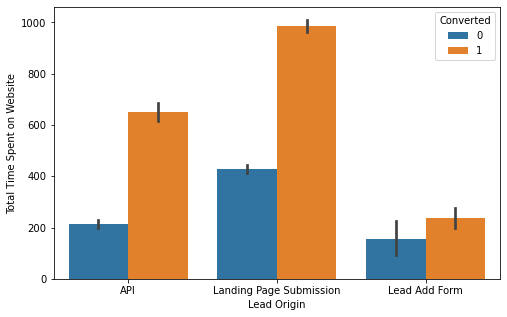

In [89]:
plt.figure(figsize=(8,5))
sns.barplot(x = "Lead Origin", hue = "Converted", y='Total Time Spent on Website', data = lead)

plt.show()

#### Inferences

-  In Api and Landing Page Submission we can observe that it brings out highest number of leads as well as conversion.

-  Lead add form has lower count of lead but it has higher conversion rate.

-  So by this observation we have to generate more leads from Lead Add Form and improve lead conversion rate of API and        Landing Page Submission origin in order to increase overall lead conversion rate

### 5.2.2 Lead Source

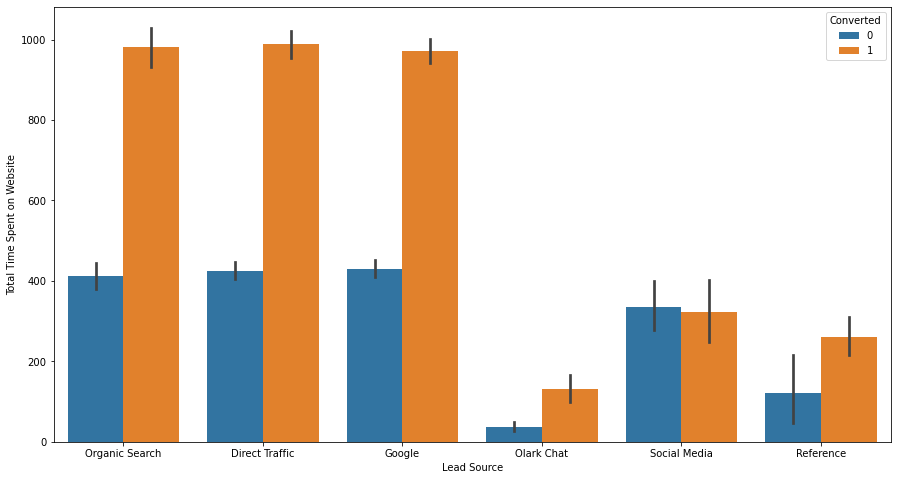

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Lead Source", hue = "Converted", y = 'Total Time Spent on Website', data = lead)

plt.show()

### Inferences

- Organic Search, Direct Traffic and Google has high conversion rate
- Reference and Olark Chat we can observe that it is generating maximum number of leads. 
- Social Media have lowest conversion rate as compared to others.
- So by this observation we have to focus more on 'Social Media', 'Organic search', 'Direct traffic' and 'Google' leads to improve overall lead conversion rate.

### 5.2.3  City

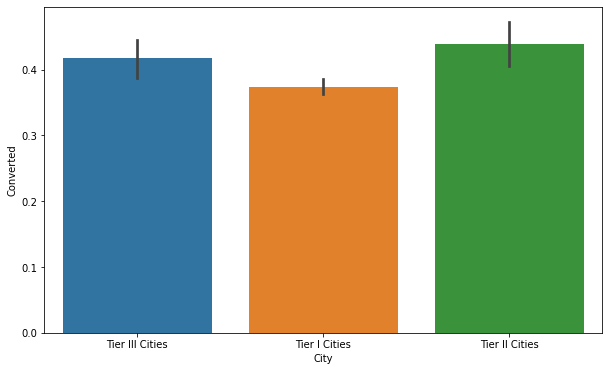

In [91]:
fig, axs = plt.subplots(figsize = (10,6))
sns.barplot(x = "City", y = "Converted",data = lead)

plt.show()

### Inferences

- Tier I Cities, Tier II Cities, Tier III Cities are equally important for analysis.

### 5.2.4 Last Activity

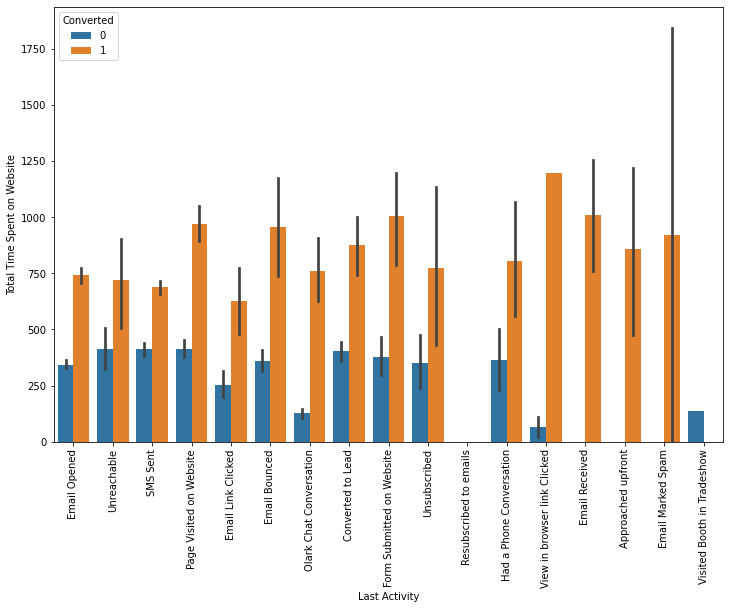

In [92]:
fig, axs = plt.subplots(figsize = (12,8))
sns.barplot(x = "Last Activity", hue = "Converted", y = 'Total Time Spent on Website', data = lead)
xticks(rotation = 90)
plt.show()

### Inferences

- Conversion rate of View in browser link clicked is Highest compared with others followed by Olark Chart Conversation.


### 5.2.5 Numeric Columns

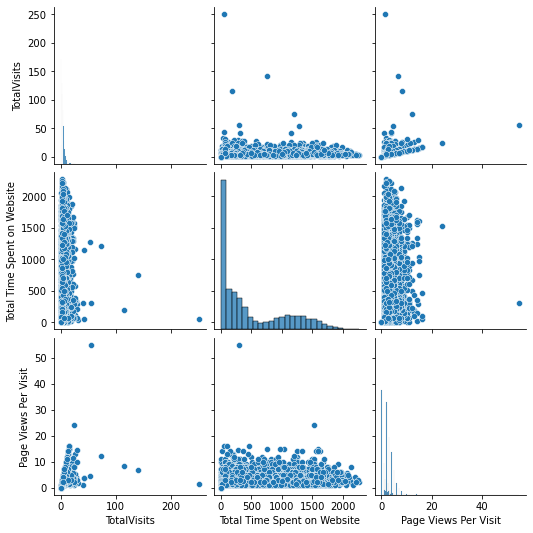

In [93]:
numerical_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#plt.figure(figsize = [24,24])
sns.pairplot(lead[numerical_columns])
plt.show()


### 5.2.6 What is your current occupation

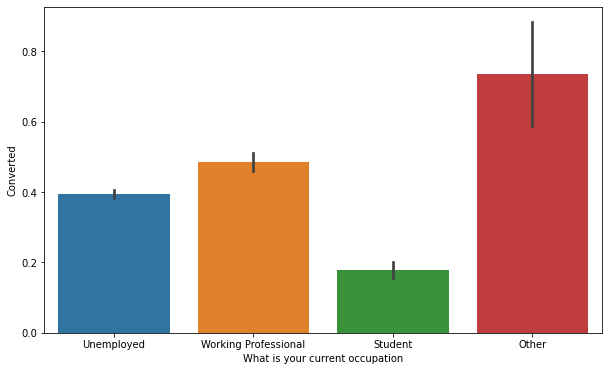

In [94]:
fig, axs = plt.subplots(figsize = (10,6))
sns.barplot(x = "What is your current occupation", y = "Converted",data = lead)

plt.show()

### Inferences

- Other Category are highest in number followed by Working Professional 

### Dropping redundant columns

In [95]:
# Dropping column 'Last Activity','Lead Profile','Last Notable Activity','Tags'

redundant_column = ['Last Activity','Lead Profile','Last Notable Activity','Tags']
lead = lead.drop(redundant_column,1)

## 5.3 Univariate Analysis

In [96]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,0.312554
std,0.486714,4.819024,548.021466,2.145781,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

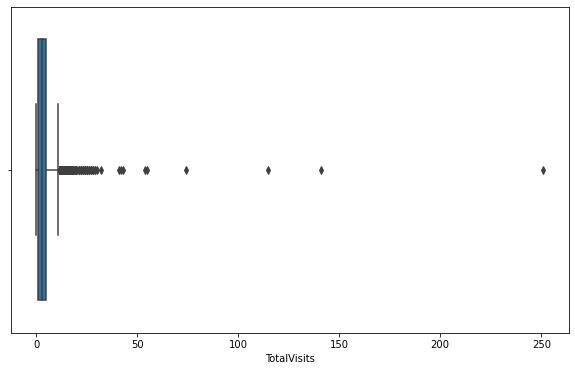

In [97]:
plt.figure(figsize = [10,6])
sns.boxplot(x = 'TotalVisits', data = lead)
plt.show

### Inference 

- In Columns 'Page Views Per Visit ' and 'TotalVisits' have outliers so we have to treat them

- To overcome outliers problem Lets assume that customers has not visited website more than 40 times

In [98]:
lead = lead[lead.TotalVisits < 40]

In [99]:
lead.shape

(9231, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

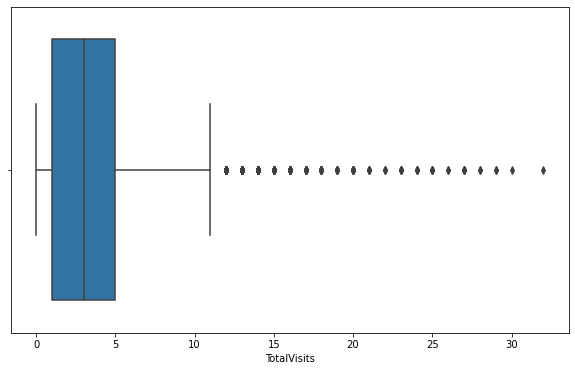

In [100]:
plt.figure(figsize = [10,6])
sns.boxplot(x = 'TotalVisits', data = lead)
plt.show

### 5.3.1 Page Views Per Visit

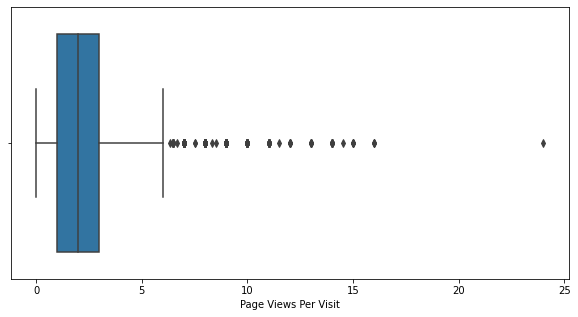

In [101]:
plt.figure(figsize=[10,5])
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

### 5.3.2 Total Visits

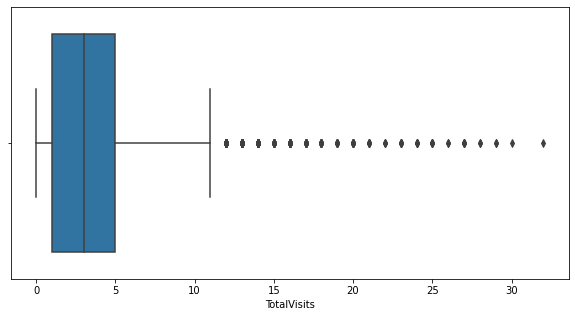

In [102]:
plt.figure(figsize=[10,5])
sns.boxplot(lead['TotalVisits'])
plt.show()

### 5.2.3 Total Time Spent on Website

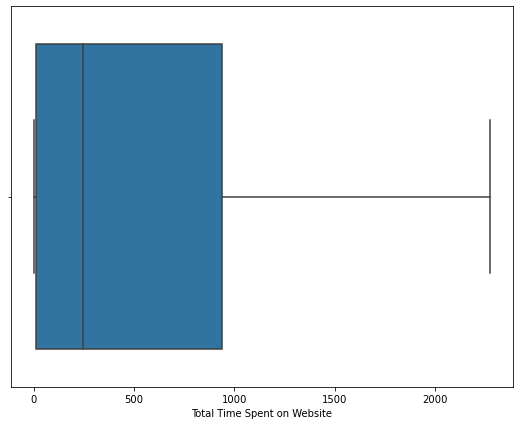

In [103]:
plt.figure(figsize=[9,7])
sns.boxplot(lead['Total Time Spent on Website'])
plt.show()

In [104]:
#Percentage of missing values for all columns 

null_count = round(100*(lead.isnull().sum()/len(lead.index)),2)
null_count

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

### Now data is free from missing values and ready for further analysis

## Step 6: Data Preparation

### 6.1 Created dummy variable for some of the categorical variables

In [105]:
dummy_lead_1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation',
                              'City']], drop_first=True)
dummy_lead_1.head()



,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2035,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
2244,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3737,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
2234,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4211,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1


In [106]:
# Adding the results To lead data set

lead = pd.concat([lead, dummy_lead_1], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2035,09f4e67b-c462-48a2-9c15-5d707364b8a9,API,Organic Search,0,5.0,271,1.25,Other,Unemployed,Tier III Cities,...,0,0,0,0,1,0,1,0,0,1
2244,6a463a83-3c5e-42e5-bb0e-e8e65f19b930,Landing Page Submission,Direct Traffic,1,14.0,1336,2.80,Other,Working Professional,Tier I Cities,...,0,0,0,0,1,0,0,1,0,0
3737,eb84b904-5ae5-45a7-be60-257b21408b2c,Landing Page Submission,Google,1,9.0,1402,3.00,Other,Working Professional,Tier III Cities,...,0,0,0,0,1,0,0,1,0,1
2234,ef6ab1b4-d791-4c66-afd2-3a9fbca1c5f4,Landing Page Submission,Direct Traffic,0,2.0,130,2.00,Other,Working Professional,Tier I Cities,...,0,0,0,0,1,0,0,1,0,0
4211,b298550c-1993-48b9-a94f-7cdd1cb2f9c2,Landing Page Submission,Google,1,4.0,395,4.00,Other,Working Professional,Tier III Cities,...,0,0,0,0,1,0,0,1,0,1


In [107]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City'], axis = 1)

In [108]:
lead.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2035,09f4e67b-c462-48a2-9c15-5d707364b8a9,0,5.0,271,1.25,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2244,6a463a83-3c5e-42e5-bb0e-e8e65f19b930,1,14.0,1336,2.80,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3737,eb84b904-5ae5-45a7-be60-257b21408b2c,1,9.0,1402,3.00,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
2234,ef6ab1b4-d791-4c66-afd2-3a9fbca1c5f4,0,2.0,130,2.00,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4211,b298550c-1993-48b9-a94f-7cdd1cb2f9c2,1,4.0,395,4.00,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1


## 6.2 Spiliting data set

In [109]:
# Importing Necessary library for model building

from sklearn.model_selection import train_test_split

In [110]:
# Splitting the data into train and test

df_train, df_test = train_test_split(lead, train_size = 0.7, random_state = 100)

## 6.3 Feature Scaling

In [111]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_train.head()


,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2197,fb240769-8db1-4572-ae96-1ef4ca9187cd,1,0.09375,0.325264,0.125000,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
6915,c6e4aa08-4f28-4703-8587-997f748efcef,0,0.12500,0.062060,0.083333,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
6309,5ce5518b-68f6-45c5-ab60-a358eb64d7d9,1,0.00000,0.000000,0.000000,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
6135,dc8d1b8a-0b55-4444-8683-079eefeaac2e,0,0.00000,0.000000,0.000000,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
709,4d00b9be-fa39-44fd-8a9f-ed5960d80c77,1,0.03125,0.529489,0.041667,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [112]:
y_train = df_train.Converted
X_train = df_train.drop(['Converted','Prospect ID'],axis =1)

In [113]:
X_train.shape

(6461, 20)

In [114]:
y_train.shape

(6461,)

In [115]:
y_test = df_test.Converted
X_test = df_test.drop(['Converted','Prospect ID'],axis =1)

In [116]:
X_test.shape


(2770, 20)

In [117]:
y_test.shape

(2770,)

## 6.4 Correlation in dataset

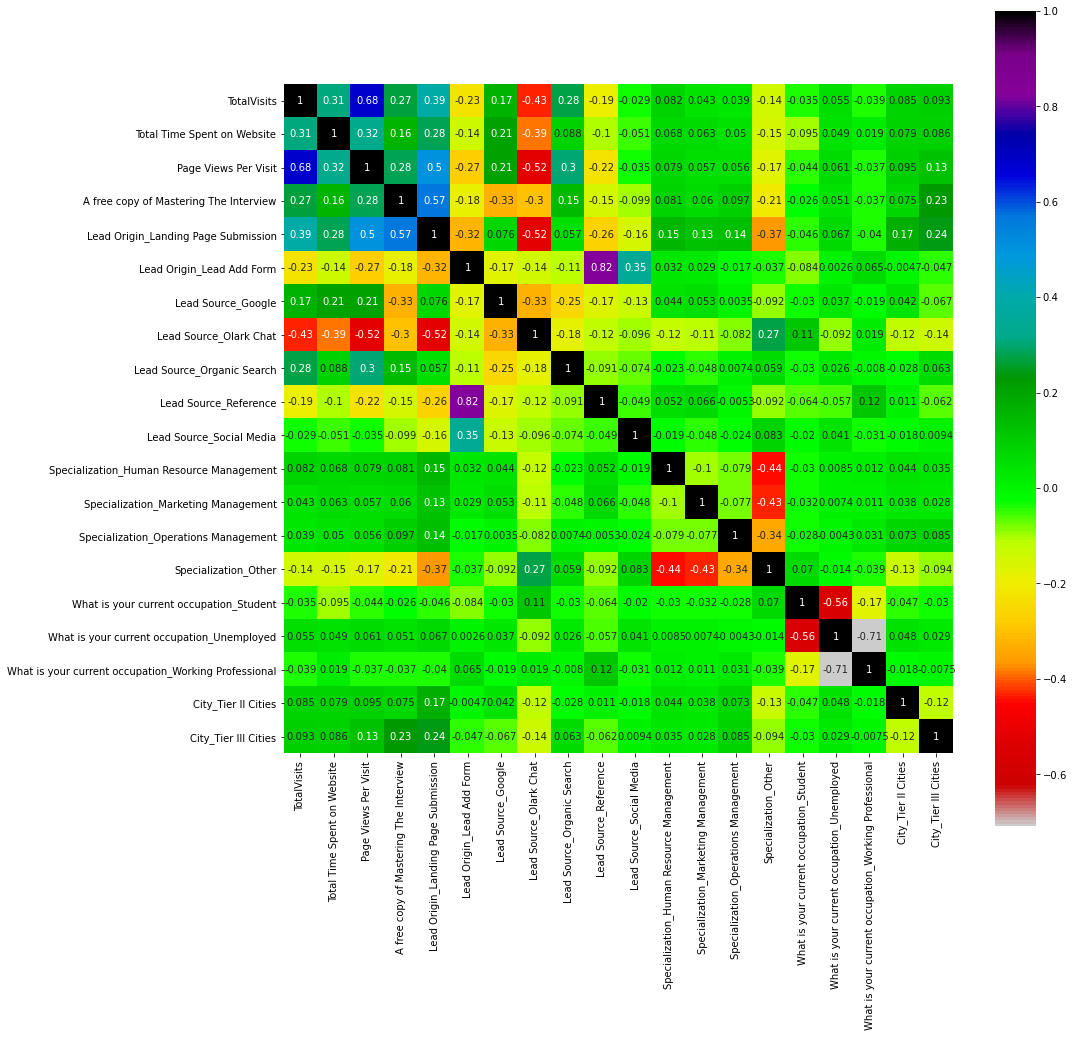

In [118]:
corr = X_train.corr()

plt.figure(figsize = [15,15])
sns.heatmap(corr, annot = True, square = True, cmap = 'nipy_spectral_r')
plt.show()


### Inferences

- From above heat map we can observe there is multicollinearity in 'TotalVisits', 'A free copy of Mastering The Interview',   'Lead Source_Organic Search', 'Lead Origin_Lead Add Form','Lead Origin_Landing Page Submission' columns to overcome this we will have to remove these column.

In [119]:
dropping_columns = ['TotalVisits', 'A free copy of Mastering The Interview',
             'Lead Source_Organic Search', 'Lead Origin_Lead Add Form','Lead Origin_Landing Page Submission']

In [120]:
# Dropping the columns to overcome multicollinearity

X_train.drop(dropping_columns, axis = 1, inplace = True)

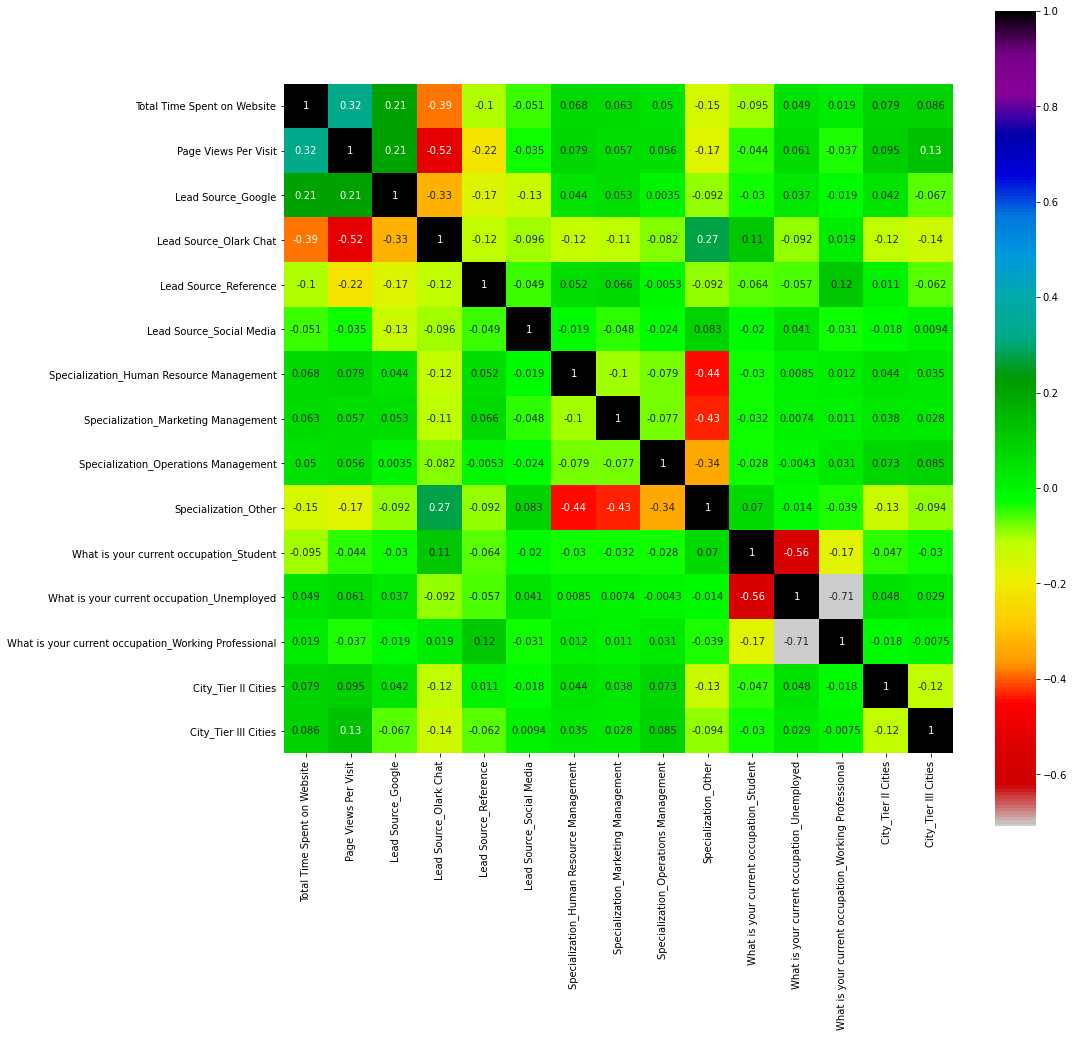

In [121]:
corr = X_train.corr()

plt.figure(figsize = [15,15])
sns.heatmap(corr, annot = True, square = True, cmap = 'nipy_spectral_r')
plt.show()


## Step 7: Model Building

### 7.1 Running First model

In [122]:
import statsmodels.api as sm

In [123]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3385.2
Date:                Wed, 08 Dec 2021   Deviance:                       6770.4
Time:                        00:00:45   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8040      0.551     -1.458      0.145      -1.885       0.277
Total Time Spent on Website                              4.3168      0.147     29.368      0.000       4.029       4.605
Page Views Per Visit                                    -0.8310      0.440     -1.889      0.059      -1.693       0.031
Lead Source_Google                                       0.2848      0.071      4.021      0.000       0.146       0.424
Lead Source_Olark Chat                                   0.8349      0.109      7.627      0.000       0.620       1.049
Lead Source_Reference                                    4.0139      0.216     18.560      0.000       3.590       4.438
Lead Source_Social Media                                 1.6262      0.152     10.681      0.000       1.328       1.925
Specialization_Human Resource Management                -0.0323      0.134     -0.242      0.809      -0.294       0.230
Specialization_Marketing Management                      0.0328      0.136      0.241      0.809      -0.233       0.299
Specialization_Operations Management                     0.0978      0.153      0.638      0.523      -0.203       0.398
Specialization_Other                                    -0.3098      0.102     -3.037      0.002      -0.510      -0.110
What is your current occupation_Student                 -1.7603      0.548     -3.212      0.001      -2.834      -0.686
What is your current occupation_Unemployed              -0.8422      0.539     -1.562      0.118      -1.899       0.214
What is your current occupation_Working Professional    -0.5861      0.542     -1.080      0.280      -1.649       0.477
City_Tier II Cities                                     -0.0005      0.108     -0.005      0.996      -0.212       0.211
City_Tier III Cities                                     0.2068      0.092      2.242      0.025       0.026       0.387
========================================================================================================================
"""

## Step 7.2: Feature Selection Using RFE

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [125]:
# select 15 counts as features selection
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)


In [126]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [127]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Tier II Cities', True, 1),
 ('City_Tier III Cities', True, 1)]

In [128]:
col = X_train.columns[rfe.support_]

In [129]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### 7.3 Assessing the model with StatsModels

In [130]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3385.2
Date:                Wed, 08 Dec 2021   Deviance:                       6770.4
Time:                        00:03:17   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8040      0.551     -1.458      0.145      -1.885       0.277
Total Time Spent on Website                              4.3168      0.147     29.368      0.000       4.029       4.605
Page Views Per Visit                                    -0.8310      0.440     -1.889      0.059      -1.693       0.031
Lead Source_Google                                       0.2848      0.071      4.021      0.000       0.146       0.424
Lead Source_Olark Chat                                   0.8349      0.109      7.627      0.000       0.620       1.049
Lead Source_Reference                                    4.0139      0.216     18.560      0.000       3.590       4.438
Lead Source_Social Media                                 1.6262      0.152     10.681      0.000       1.328       1.925
Specialization_Human Resource Management                -0.0323      0.134     -0.242      0.809      -0.294       0.230
Specialization_Marketing Management                      0.0328      0.136      0.241      0.809      -0.233       0.299
Specialization_Operations Management                     0.0978      0.153      0.638      0.523      -0.203       0.398
Specialization_Other                                    -0.3098      0.102     -3.037      0.002      -0.510      -0.110
What is your current occupation_Student                 -1.7603      0.548     -3.212      0.001      -2.834      -0.686
What is your current occupation_Unemployed              -0.8422      0.539     -1.562      0.118      -1.899       0.214
What is your current occupation_Working Professional    -0.5861      0.542     -1.080      0.280      -1.649       0.477
City_Tier II Cities                                     -0.0005      0.108     -0.005      0.996      -0.212       0.211
City_Tier III Cities                                     0.2068      0.092      2.242      0.025       0.026       0.387
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of City_Tier II Cities is higher than 0.05 so we are dropping City_Tier II Cities column

In [131]:
col = col.drop('City_Tier II Cities')

In [132]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier III Cities'],
      dtype='object')

In [133]:
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3385.2
Date:                Wed, 08 Dec 2021   Deviance:                       6770.4
Time:                        00:05:20   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8041      0.551     -1.459      0.145      -1.884       0.276
Total Time Spent on Website                              4.3168      0.147     29.381      0.000       4.029       4.605
Page Views Per Visit                                    -0.8311      0.440     -1.891      0.059      -1.693       0.030
Lead Source_Google                                       0.2848      0.071      4.022      0.000       0.146       0.424
Lead Source_Olark Chat                                   0.8349      0.109      7.639      0.000       0.621       1.049
Lead Source_Reference                                    4.0139      0.216     18.560      0.000       3.590       4.438
Lead Source_Social Media                                 1.6262      0.152     10.683      0.000       1.328       1.925
Specialization_Human Resource Management                -0.0323      0.134     -0.242      0.809      -0.294       0.230
Specialization_Marketing Management                      0.0328      0.136      0.242      0.809      -0.233       0.299
Specialization_Operations Management                     0.0978      0.153      0.638      0.523      -0.203       0.398
Specialization_Other                                    -0.3098      0.102     -3.044      0.002      -0.509      -0.110
What is your current occupation_Student                 -1.7603      0.548     -3.212      0.001      -2.834      -0.686
What is your current occupation_Unemployed              -0.8422      0.539     -1.562      0.118      -1.899       0.214
What is your current occupation_Working Professional    -0.5861      0.542     -1.080      0.280      -1.649       0.477
City_Tier III Cities                                     0.2068      0.091      2.269      0.023       0.028       0.385
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of Specialization_Marketing Management is higher than 0.05 so we are dropping Specialization_Marketing Management column

In [134]:
col = col.drop('Specialization_Marketing Management')

In [135]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Specialization_Human Resource Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier III Cities'],
      dtype='object')

In [136]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3385.2
Date:                Wed, 08 Dec 2021   Deviance:                       6770.5
Time:                        00:06:31   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7842      0.545     -1.439      0.150      -1.852       0.284
Total Time Spent on Website                              4.3175      0.147     29.390      0.000       4.030       4.605
Page Views Per Visit                                    -0.8313      0.440     -1.891      0.059      -1.693       0.030
Lead Source_Google                                       0.2852      0.071      4.028      0.000       0.146       0.424
Lead Source_Olark Chat                                   0.8356      0.109      7.647      0.000       0.621       1.050
Lead Source_Reference                                    4.0153      0.216     18.574      0.000       3.592       4.439
Lead Source_Social Media                                 1.6264      0.152     10.684      0.000       1.328       1.925
Specialization_Human Resource Management                -0.0475      0.118     -0.403      0.687      -0.279       0.184
Specialization_Operations Management                     0.0827      0.140      0.591      0.554      -0.191       0.357
Specialization_Other                                    -0.3250      0.080     -4.070      0.000      -0.481      -0.169
What is your current occupation_Student                 -1.7657      0.547     -3.225      0.001      -2.839      -0.693
What is your current occupation_Unemployed              -0.8473      0.539     -1.573      0.116      -1.903       0.208
What is your current occupation_Working Professional    -0.5914      0.542     -1.091      0.275      -1.654       0.471
City_Tier III Cities                                     0.2071      0.091      2.272      0.023       0.028       0.386
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of Specialization_Human Resource Management is higher than 0.05 so we are dropping Specialization_Human Resource Management column

In [137]:
col = col.drop('Specialization_Human Resource Management')

In [138]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3385.3
Date:                Wed, 08 Dec 2021   Deviance:                       6770.7
Time:                        00:08:14   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7984      0.543     -1.470      0.142      -1.863       0.266
Total Time Spent on Website                              4.3162      0.147     29.393      0.000       4.028       4.604
Page Views Per Visit                                    -0.8325      0.440     -1.894      0.058      -1.694       0.029
Lead Source_Google                                       0.2848      0.071      4.023      0.000       0.146       0.423
Lead Source_Olark Chat                                   0.8348      0.109      7.641      0.000       0.621       1.049
Lead Source_Reference                                    4.0142      0.216     18.570      0.000       3.591       4.438
Lead Source_Social Media                                 1.6245      0.152     10.676      0.000       1.326       1.923
Specialization_Operations Management                     0.0983      0.134      0.732      0.464      -0.165       0.362
Specialization_Other                                    -0.3093      0.070     -4.438      0.000      -0.446      -0.173
What is your current occupation_Student                 -1.7666      0.547     -3.231      0.001      -2.838      -0.695
What is your current occupation_Unemployed              -0.8480      0.538     -1.576      0.115      -1.902       0.207
What is your current occupation_Working Professional    -0.5919      0.541     -1.093      0.274      -1.653       0.469
City_Tier III Cities                                     0.2065      0.091      2.266      0.023       0.028       0.385
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of Specialization_Operations Management is higher than 0.05 so we are dropping Specialization_Operations Management column

In [139]:
col = col.drop('Specialization_Operations Management')

In [140]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3385.6
Date:                Wed, 08 Dec 2021   Deviance:                       6771.2
Time:                        00:09:12   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7887      0.543     -1.452      0.146      -1.853       0.276
Total Time Spent on Website                              4.3156      0.147     29.390      0.000       4.028       4.603
Page Views Per Visit                                    -0.8361      0.439     -1.903      0.057      -1.697       0.025
Lead Source_Google                                       0.2829      0.071      3.999      0.000       0.144       0.422
Lead Source_Olark Chat                                   0.8341      0.109      7.638      0.000       0.620       1.048
Lead Source_Reference                                    4.0091      0.216     18.557      0.000       3.586       4.433
Lead Source_Social Media                                 1.6241      0.152     10.674      0.000       1.326       1.922
Specialization_Other                                    -0.3261      0.066     -4.959      0.000      -0.455      -0.197
What is your current occupation_Student                 -1.7591      0.547     -3.218      0.001      -2.831      -0.688
What is your current occupation_Unemployed              -0.8400      0.538     -1.562      0.118      -1.894       0.214
What is your current occupation_Working Professional    -0.5826      0.541     -1.076      0.282      -1.643       0.478
City_Tier III Cities                                     0.2095      0.091      2.301      0.021       0.031       0.388
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of What is your current occupation_Working Professional is higher than 0.05 so we are dropping What is your current occupation_Working Professional column

In [141]:
col = col.drop('What is your current occupation_Working Professional')

In [142]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3386.2
Date:                Wed, 08 Dec 2021   Deviance:                       6772.4
Time:                        00:09:39   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3601      0.115    -11.875      0.000      -1.585      -1.136
Total Time Spent on Website                    4.3166      0.147     29.399      0.000       4.029       4.604
Page Views Per Visit                          -0.8330      0.439     -1.896      0.058      -1.694       0.028
Lead Source_Google                             0.2810      0.071      3.974      0.000       0.142       0.420
Lead Source_Olark Chat                         0.8318      0.109      7.619      0.000       0.618       1.046
Lead Source_Reference                          4.0085      0.216     18.558      0.000       3.585       4.432
Lead Source_Social Media                       1.6222      0.152     10.661      0.000       1.324       1.920
Specialization_Other                          -0.3268      0.066     -4.971      0.000      -0.456      -0.198
What is your current occupation_Student       -1.1862      0.124     -9.555      0.000      -1.430      -0.943
What is your current occupation_Unemployed    -0.2673      0.077     -3.460      0.001      -0.419      -0.116
City_Tier III Cities                           0.2076      0.091      2.280      0.023       0.029       0.386
==============================================================================================================
"""

### Inferences

- Here we can observe that the p-value of all features are less than 0.05

### 7.4 Checking VIFs

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = ['VIF'], ascending = False)
vif


,Features,VIF
8,What is your current occupation_Unemployed,3.36
6,Specialization_Other,2.81
1,Page Views Per Visit,2.80
0,Total Time Spent on Website,2.03
3,Lead Source_Olark Chat,1.81
2,Lead Source_Google,1.66
7,What is your current occupation_Student,1.43
9,City_Tier III Cities,1.17
5,Lead Source_Social Media,1.10
4,Lead Source_Reference,1.09


### Inferences

- As we can observe from above table all the features has VIF less than 5 so it gives result as data has no collinearity.

### 7.5 Assesing model

In [144]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2197    0.215472
6915    0.186223
6309    0.417750
6135    0.298354
709     0.711866
235     0.129922
7853    0.773249
8728    0.559518
1193    0.745573
5730    0.110261
dtype: float64

In [145]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21547248, 0.18622266, 0.41774965, 0.29835357, 0.71186563,
       0.1299216 , 0.77324879, 0.55951792, 0.74557346, 0.11026106])

In [146]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability': y_train_pred})
y_train_pred_final['Cust_ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_probability,Cust_ID
0,1,0.215472,2197
1,0,0.186223,6915
2,1,0.417750,6309
3,0,0.298354,6135
4,1,0.711866,709


In [147]:
y_train_pred_final = y_train_pred_final.sort_values(by = 'Converted_probability', ascending = False)
y_train_pred_final.head()


,Converted,Converted_probability,Cust_ID
3510,1,0.997577,639
3202,1,0.997371,6712
5478,1,0.997125,2656
1997,1,0.996906,3032
3407,1,0.996744,6565


## Step 8: Plotting the ROC Curve 

Given An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.



In [148]:
from sklearn import metrics
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

In [149]:


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [150]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )


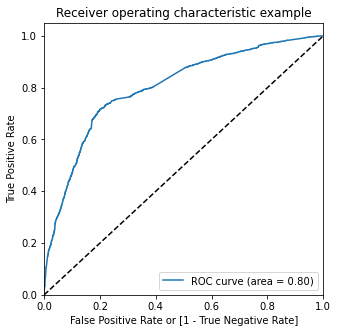

In [151]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Some Points to be concluded from above ROC curve -

- From above graph , we can see that the curve is closer to the left side of the border than to the right side hence our model     is having great accuracy.
- The area under the curve is 80% of the total area.



## Step 9: Finding Optimal Cutoff Point

In [152]:

# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()  



,Converted,Converted_probability,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3510,1,0.997577,639,1,1,1,1,1,1,1,1,1,1
3202,1,0.997371,6712,1,1,1,1,1,1,1,1,1,1
5478,1,0.997125,2656,1,1,1,1,1,1,1,1,1,1
1997,1,0.996906,3032,1,1,1,1,1,1,1,1,1,1
3407,1,0.996744,6565,1,1,1,1,1,1,1,1,1,1


- Here, Now after finding series of probability next step is to check Accuracy, Sensitivity and Specificity for each point

In [153]:
from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.390342    1.000000     0.000000
0.1          0.1  0.421452    0.994845     0.054329
0.2          0.2  0.584739    0.918715     0.370906
0.3          0.3  0.748800    0.754956     0.744859
0.4          0.4  0.767993    0.685170     0.821021
0.5          0.5  0.752360    0.576527     0.864940
0.6          0.6  0.732240    0.470262     0.899975
0.7          0.7  0.706237    0.344171     0.938055
0.8          0.8  0.674818    0.210547     0.972074
0.9          0.9  0.647268    0.107454     0.992892


<Figure size 864x864 with 0 Axes>

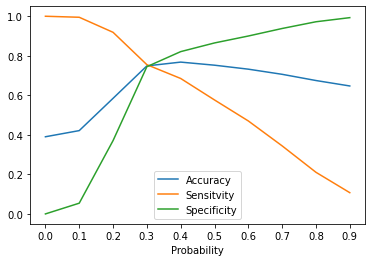

In [154]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

plt.figure(figsize = [12,12])
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.xticks(numbers)
plt.show()

### Inferences

- From The above plot we can observe probability threshold is nearly 0.3. Considering 0.3 to tradeoff sensitivity against accuracy

In [155]:

# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()



,Converted,Converted_probability,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
3510,1,0.997577,639,1,1,1,1,1,1,1,1,1,1,1
3202,1,0.997371,6712,1,1,1,1,1,1,1,1,1,1,1
5478,1,0.997125,2656,1,1,1,1,1,1,1,1,1,1,1
1997,1,0.996906,3032,1,1,1,1,1,1,1,1,1,1,1
3407,1,0.996744,6565,1,1,1,1,1,1,1,1,1,1,1


## Step 10: Precision and Recall

In [156]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[2934, 1005],
       [ 618, 1904]], dtype=int64)

In [157]:
print('Precision Value is',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1])*100) 

print('Recall Value is',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1])*100) 

Precision Value is 65.45204537641801
Recall Value is 75.49563838223632


### Inferences from

- Now, We will focus more on Recall value rather than Precision value because we don't want to miss the lead which are willing to get converted rather than who the one who is having low probability to get converted. 

In [158]:
# Getting Sensitivity
sensitivity = confusion_pr[1,1]/(confusion_pr[1,1] + confusion_pr[1,0])
sensitivity*100

75.49563838223632

In [159]:
# Getting Specificity
specificity = confusion_pr[0,0]/(confusion_pr[0,0]+confusion_pr[0,1])
specificity*100

74.48591012947449

In [160]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
accuracy*100

74.88004952793685

### Sensitivity for Training Data set is 75.49%

### Specificity for Training Data set is 74.48%

### Accuracy for Training Data set 74.88%


## 10.2 Precision and Recall Tradeoff 

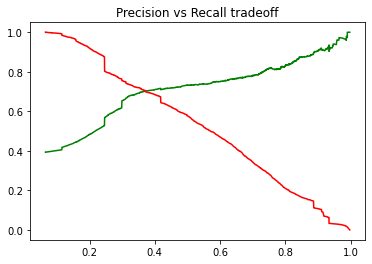

In [161]:
from sklearn.metrics import precision_recall_curve

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

### Inferences from 

- Here, From above plot we can observe there is tradeoff between Precision and recall and optinum point is nearly at 0.4

## Step 11 : Making predictions on the test set

In [162]:
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns]) 

In [163]:
X_test = X_test[col]
X_test.head()


,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,City_Tier III Cities
2462,0.047975,0.083333,1,0,0,0,1,0,1,1
5632,0.132482,0.083333,0,0,1,0,0,0,1,0
3521,0.500000,0.208333,1,0,0,0,0,0,0,0
6713,0.506602,0.083333,0,0,0,0,1,0,1,0
8247,0.168574,0.083333,0,0,0,0,0,0,1,0


In [164]:
X_test_sm = sm.add_constant(X_test)

In [165]:
y_test_pred = res.predict(X_test_sm)

In [166]:
y_test_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)


In [167]:
y_test_df['Cust_ID'] = y_test_df.index

In [168]:
y_test_df.reset_index(drop = True, inplace = True)
y_test_1.reset_index(drop = True, inplace = True)

In [169]:
y_pred_final = pd.concat([y_test_1,y_test_df], axis = 1)

In [170]:
y_pred_final.head()

,0,Converted,Cust_ID
0,0.209497,0,2462
1,0.947027,0,5632
2,0.712100,1,3521
3,0.540706,0,6713
4,0.275054,0,8247


In [171]:
y_pred_final = y_pred_final.rename(columns = {0:'Converted_probability'})

y_pred_final = y_pred_final[['Cust_ID','Converted','Converted_probability']]

In [172]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.4 else 0)

In [173]:
y_pred_final = y_pred_final.sort_values(by = 'Converted_probability', ascending = False)

y_pred_final.head()

,Cust_ID,Converted,Converted_probability,Final_Predicted
1193,3478,1,0.996933,1
2210,4123,1,0.996841,1
2127,6647,1,0.996791,1
2684,1548,1,0.995811,1
1460,5293,1,0.995424,1


In [174]:
y_pred_final['Score'] = y_pred_final.Converted_probability.apply(lambda x: round(x*100,2))

y_pred_final

,Cust_ID,Converted,Converted_probability,Final_Predicted,Score
1193,3478,1,0.996933,1,99.69
2210,4123,1,0.996841,1,99.68
2127,6647,1,0.996791,1,99.68
2684,1548,1,0.995811,1,99.58
1460,5293,1,0.995424,1,99.54
...,...,...,...,...,...
2165,6934,0,0.051557,0,5.16
1176,7465,0,0.048640,0,4.86
1180,885,0,0.048173,0,4.82
6,4762,0,0.044990,0,4.50


In [175]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion2


array([[1447,  285],
       [ 325,  713]], dtype=int64)

In [176]:
# Check sensitivity

sensitivity_test = confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])
sensitivity_test*100

68.68978805394991

In [158]:
# Check Specificity

specificity_test = confusion2[0,0]/(confusion2[0,1]+confusion2[0,0])
specificity_test*100

83.1986143187067

In [159]:
# Check Accuracy

accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)
accuracy_test*100

77.83393501805054

### Here, Sensitivity for Test Data set is 68.68%

### Here, Specificity for Test Data set is 83.19%

### Here , Accuracy for Test Data set s 77.83%

## Step 12: Conclusion

- Some Important features we got during training of model which is responsible for good conversion rate are as follows 
##### 1] Total Time Spent on Website
#####  2] Lead Source_Reference
#####  3] Lead Source_Social Media
 

- The Recall value greater than Precision Value also it is acceptable for Business aspect.

- Sensitivity, Specificity, Accuracy we got from test data set when compared with train data set it is in acceptable range.

- The model has ability to adjust as per company requirement